In [1]:
import pandas as pd 
import os 

data_path = '/legodata/zhaoj/cvd_risk_time2/genetic_data' 
results_path = '/legodata/zhaoj/cvd_risk_time2/src/dnn/'


df_pred = pd.read_csv(os.path.join(results_path, 'df_pred_5e7.csv'))
df_train = pd.read_csv(os.path.join(results_path, 'df_train_5e7.csv'))

In [2]:
df_pred.head()

,CLASS,FOLD,PRED,SCORE
0,0,0,1,0.783108
1,0,0,0,0.215101
2,0,0,1,0.633181
3,1,0,1,0.611211
4,0,0,0,0.479501


In [3]:
# score_lst = list()
# for score in list(df_pred['SCORE']): 
#     score_lst.extend([float(score[2:][:-1])])

# df_pred['SCORE'] = score_lst
df_pred.head()

,CLASS,FOLD,PRED,SCORE
0,0,0,1,0.783108
1,0,0,0,0.215101
2,0,0,1,0.633181
3,1,0,1,0.611211
4,0,0,0,0.479501


In [4]:
df_train.head()

,ACC,EPOCH,FOLD,LOSS,VAL_ACC,VAL_LOSS
0,0.348083,0,0,0.828198,0.354925,0.727876
1,0.355843,1,0,0.804957,0.363606,0.737754
2,0.358980,2,0,0.791213,0.352922,0.746355
3,0.364965,3,0,0.776093,0.354591,0.748720
4,0.365419,4,0,0.765234,0.344574,0.747564


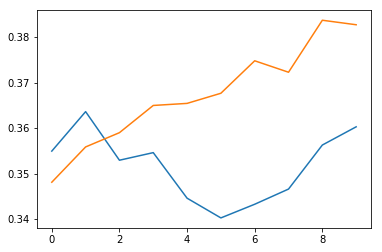

In [5]:
import matplotlib.pyplot as plt

plt.plot(list(df_train['EPOCH']), list(df_train['VAL_ACC']))
plt.plot(list(df_train['EPOCH']), list(df_train['ACC']))
plt.show()

In [6]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(df_pred['CLASS'], df_pred['SCORE']))

0.539850867817


0.546721734641
0.535044422507
0.547027027027
0.555325749741


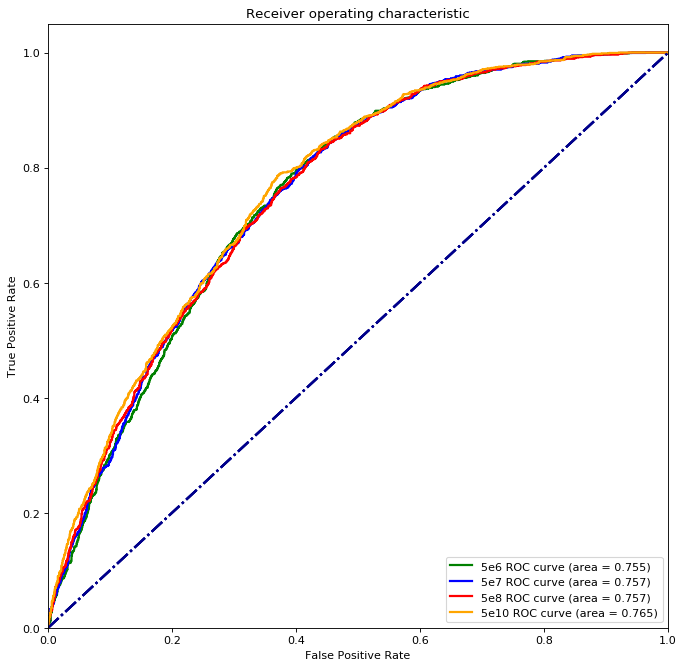

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
color = ['orange', 'red', 'blue', 'green']

for thresh in ['5e6', '5e7', '5e8', '5e10']: 
    df_pred = pd.read_csv(os.path.join(results_path, '{}_full_pred.csv'.format(thresh)))
#     df_train = pd.read_csv(os.path.join(results_path, 'df_train_{}.csv'))

    print(precision_score(df_pred['CLASS'], df_pred['PRED']))
    
    lw = 2

    n_classes = 2
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(df_pred['CLASS'], df_pred['SCORE'])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # # Compute micro-average ROC curve and ROC area
    # fpr["micro"], tpr["micro"], _ = roc_curve(df_pred['PRED'].ravel(), df_pred['SCORE'].ravel())
    # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    plt.plot(fpr[1], tpr[1], color=color.pop(),  
             lw=lw, label='{} ROC curve (area = {})'.format(thresh, round(roc_auc[1], 3)))

    plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='-.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

plt.show()

In [ ]:
from